In [83]:
import pandas as pd
import matplotlib as plt
import os
import numpy as np


In [84]:
def import_retail_data():
    csv_file_path = 'Online Retail.csv'
    xlsx_file_path = 'Online Retail.xlsx'
    
    global df  # Declare df as a global variable
    
    if os.path.isfile(csv_file_path):
        df = pd.read_csv(csv_file_path)
    else:
        df = pd.read_excel(xlsx_file_path)
    
    return df


In [85]:
import_retail_data().head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [86]:
# Check the first few rows of the dataframe
df.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity and UnitPrice both had a min < 0.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


CustomerID, and Description both have null values

In [89]:
df.shape

(541909, 8)

In [90]:
# Check the data types of each column
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [91]:
# Check for missing values in the dataframe
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [92]:
df_null = df[df.isnull().any(axis=1)]
df = df[~df.isnull().any(axis=1)]
df['CustomerID'] = df['CustomerID'].astype(int)

In [93]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [94]:
# Check for duplicate rows in the dataframe
df.duplicated().sum()

5225

In [95]:
min_date = pd.to_datetime(df['InvoiceDate'].min())
max_date = pd.to_datetime(df['InvoiceDate'].max())
time_period = max_date - min_date

print("Time period of the data:")
print("Start date:", min_date)
print("End date:", max_date)
print("Time period:", time_period)

Time period of the data:
Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00
Time period: 373 days 04:24:00


In [96]:
num_countries = df['Country'].nunique()

In [97]:
# Calculate the number of invoices per country
invoices_per_country = df.groupby('Country')['InvoiceNo'].nunique()

# Calculate the total spent per country
total_spent_per_country = df.groupby('Country')['UnitPrice'].sum()

# Calculate the average purchase per country
average_purchase_per_country = df.groupby('Country')['UnitPrice'].mean()

# Calculate the average spent per customer for each country
average_spent_per_customer_per_country = df.groupby('Country')['UnitPrice'].sum() / df.groupby('Country')['CustomerID'].nunique()

# Create a DataFrame to store the results
country_metrics_df = pd.DataFrame({'Number of Invoices': invoices_per_country,
                                   'Total Spent': total_spent_per_country,
                                   'Average Purchase': average_purchase_per_country,
                                   'Average Spent per Customer': average_spent_per_customer_per_country})

# Display the DataFrame
#country_metrics_df.sort_values('Total Spent', ascending=False)


In [98]:
unique_stockcodes = df['StockCode'].unique()
unique_stockcodes.shape

(3684,)

In [99]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

In [100]:
# Calculate recency, frequency, and monetary metrics
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert 'InvoiceDate' column to datetime format
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (df['InvoiceDate'].max() - x).days)
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

# Create a new DataFrame for customer segmentation
segmentation_df = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})
segmentation_df["MonetaryPerInvoice"] = round(segmentation_df["Monetary"] / segmentation_df["Frequency"], 2)

# Profile the customers
#segmentation_df['Recency_cat'] = pd.qcut(segmentation_df['Recency'], q=4, labels=['Most Recent', 'Recent', 'Less Recent', 'Not Recent'])
#segmentation_df['Recency_cat'].value_counts()

segmentation_df.index = segmentation_df.index.astype(int)

segmentation_df['Avg_item_per_invoice'] = df.groupby('CustomerID')['InvoiceNo'].count() / segmentation_df['Frequency']
segmentation_df['Avg_interval_between_invoices'] = (time_period / frequency).dt.days.astype(int)



In [101]:
segmentation_df

,Recency,Frequency,Monetary,MonetaryPerInvoice,Avg_item_per_invoice,Avg_interval_between_invoices
CustomerID,,,,,,
12346,325,2,0.00,0.00,1.000000,186
12347,1,7,4310.00,615.71,26.000000,53
12348,74,4,1797.24,449.31,7.750000,93
12349,18,1,1757.55,1757.55,73.000000,373
12350,309,1,334.40,334.40,17.000000,373
...,...,...,...,...,...,...
18280,277,1,180.60,180.60,10.000000,373
18281,180,1,80.82,80.82,7.000000,373
18282,7,3,176.60,58.87,4.333333,124


K-means

In [102]:
#prep
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(segmentation_df), columns=segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

In [103]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 8

# Create the K-means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans_model.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Add the cluster labels to the segmentation_df dataframe
scaled_data['Cluster'] = cluster_labels
segmentation_df['Cluster'] = cluster_labels

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


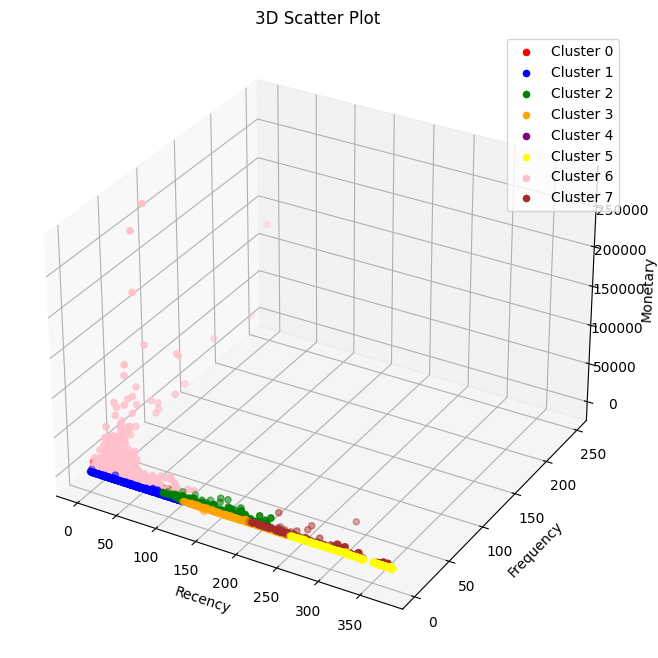

In [104]:
import matplotlib.pyplot as plt
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown']

# Plot each data point with the corresponding cluster color
for cluster in range(num_clusters):
    cluster_data = segmentation_df[segmentation_df['Cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

# Set the labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Set the title and legend
ax.set_title('3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()


In [105]:
Top_cluster = 6

In [106]:
segmentation_df[segmentation_df['Cluster'] == Top_cluster]

,Recency,Frequency,Monetary,MonetaryPerInvoice,Avg_item_per_invoice,Avg_interval_between_invoices,Cluster
CustomerID,,,,,,,
12347,1,7,4310.00,615.71,26.000000,53,6
12352,35,11,1545.41,140.49,8.636364,33,6
12359,7,6,6245.53,1040.92,42.333333,62,6
12362,2,13,5154.58,396.51,21.076923,28,6
12381,4,6,1803.96,300.66,15.166667,62,6
...,...,...,...,...,...,...,...
18241,9,18,2058.09,114.34,5.833333,20,6
18245,6,8,2507.56,313.44,22.125000,46,6
18257,38,12,2265.38,188.78,10.250000,31,6


In [107]:
scaled_data.set_index(segmentation_df.index, inplace=True)

In [108]:
Top_cluster_set = scaled_data[scaled_data['Cluster'] == Top_cluster]

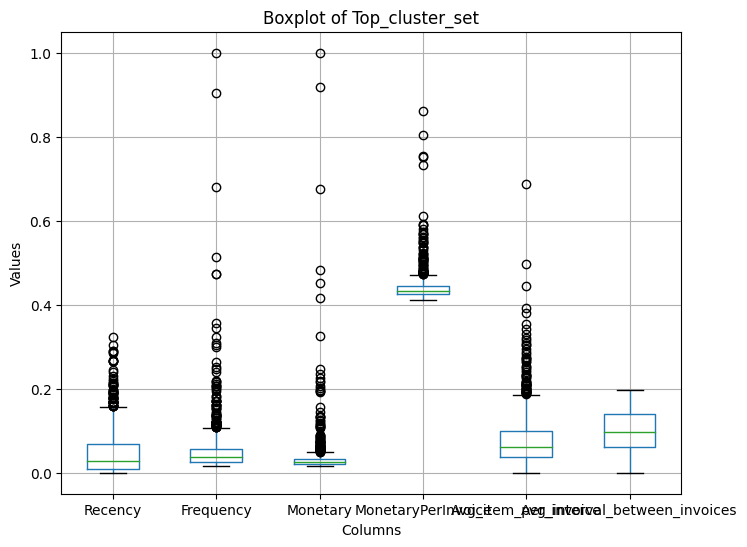

In [109]:
import matplotlib.pyplot as plt

# Create a boxplot of the columns in Top_cluster_set
plt.figure(figsize=(8, 6))
Top_cluster_set.iloc[:, :-1].boxplot()
plt.title('Boxplot of Top_cluster_set')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

K-means with limited Frequency

In [110]:
segmentation_df.drop(columns=['Cluster'], inplace=True)

In [111]:
limit_freq_segmentation_df = segmentation_df[segmentation_df['Frequency'] < 50]


In [112]:
scaled_data = pd.DataFrame(scaler.fit_transform(limit_freq_segmentation_df), columns=limit_freq_segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

In [113]:
from sklearn.cluster import KMeans

# Specify the number of clusters
num_clusters = 8

# Create the K-means model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
kmeans_model.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

limit_freq_segmentation_df['Cluster'] = cluster_labels

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nfs25\AppData\Local\Temp\ipykernel_32020\2402709719.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limit_freq_segmentation_df['Cluster'] = cluster_labels


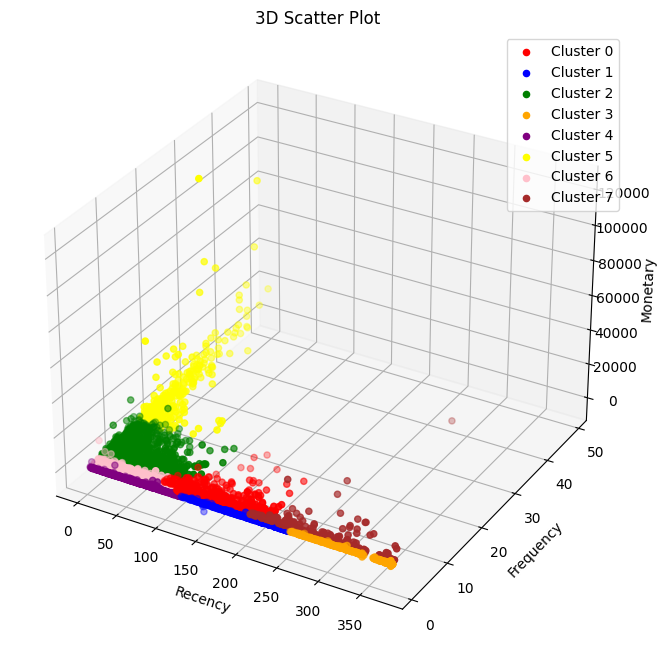

In [114]:
import matplotlib.pyplot as plt
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the colors for each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown']

# Plot each data point with the corresponding cluster color
for cluster in range(num_clusters):
    cluster_data = limit_freq_segmentation_df[limit_freq_segmentation_df['Cluster'] == cluster]
    ax.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], cluster_data.iloc[:, 2], c=colors[cluster], label=f'Cluster {cluster}')

# Set the labels for each axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Set the title and legend
ax.set_title('3D Scatter Plot')
ax.legend()

# Show the plot
plt.show()


NearestNeighbors

In [115]:
from sklearn.neighbors import NearestNeighbors

scaled_data = pd.DataFrame(scaler.fit_transform(segmentation_df), columns=segmentation_df.columns)
original_data = pd.DataFrame(scaler.inverse_transform(scaled_data))

k = 4  # For example, k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)

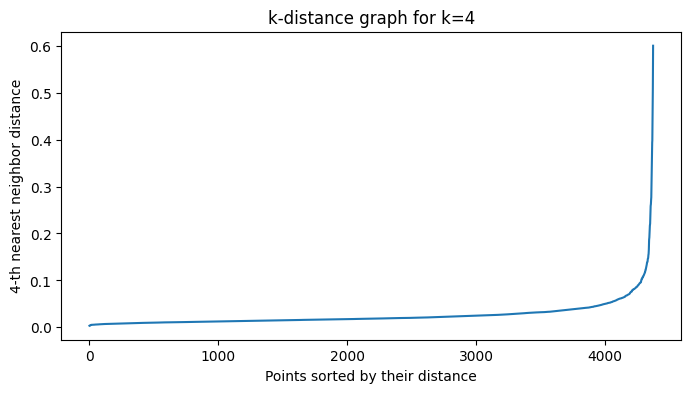

In [116]:
import matplotlib.pyplot as plt

sorted_distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.xlabel("Points sorted by their distance")
plt.ylabel(f"{k}-th nearest neighbor distance")
plt.title(f"k-distance graph for k={k}")
plt.show()

DBSCAN

In [117]:
from sklearn.cluster import DBSCAN
min_samples = 4

# Create an instance of the DBSCAN class with your chosen parameters
dbscan = DBSCAN(eps=0.1, min_samples=min_samples)

# Fit the model to your data and also return the cluster labels
clusters = dbscan.fit_predict(scaled_data)

In [118]:
clusters

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

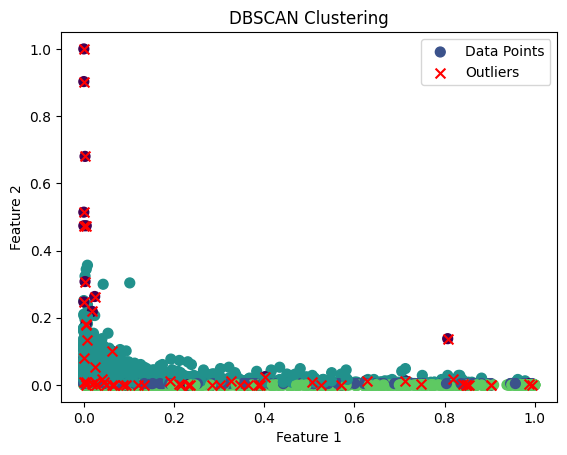

In [119]:
# Convert the DataFrame to a numpy array
scaled_data = scaled_data.to_numpy()

# Plot the points with a color for each cluster
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', marker='o', s=50, label='Data Points')

# Mark the outliers
plt.scatter(scaled_data[clusters == -1, 0], scaled_data[clusters == -1, 1], c='red', marker='x', s=50, label='Outliers')

# Add some enhancements
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()